In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb

from warnings import filterwarnings


In [2]:
data = pd.read_csv("../input/parkinsons-disease-speech-signal-features/pd_speech_features.csv")

In [3]:
data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [5]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [6]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col, data[col].unique())

In [7]:
data.isna().sum().sum()

0

In [8]:
data['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

<AxesSubplot:>

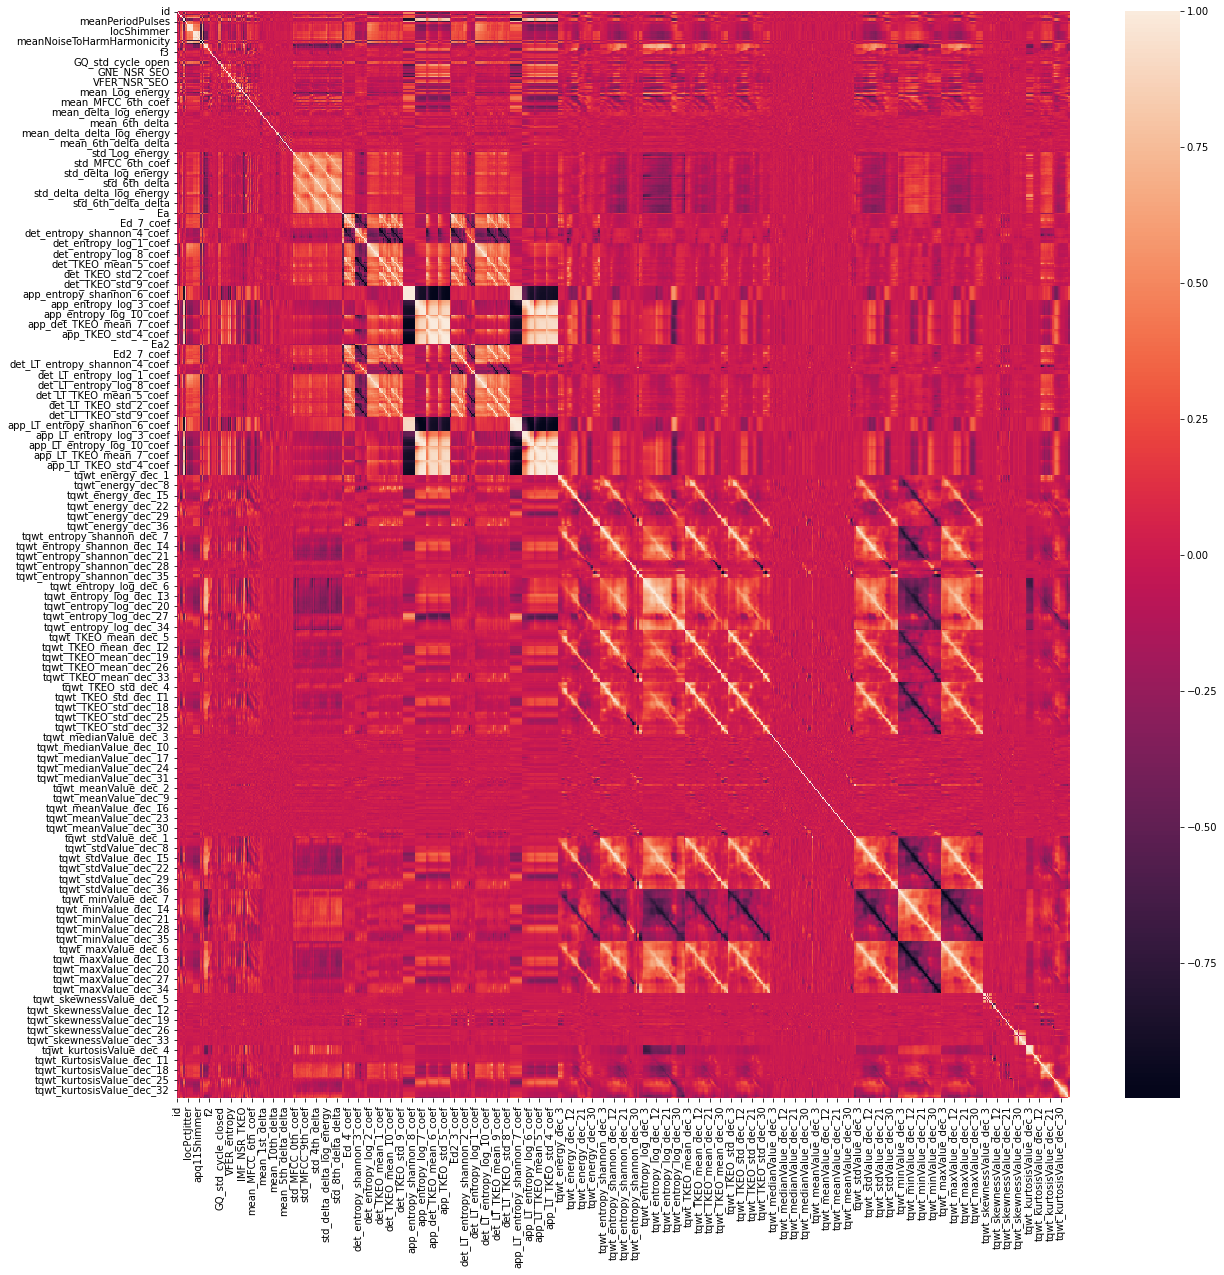

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

In [10]:
def preprocess_inputs(df):
    df = df.copy()
    df = df.drop('id',axis=1)
    
    y = df['class']
    X = df.drop('class',axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle=True, random_state=43)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns, index = X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)
    
    return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

X_train

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
330,0.939448,-2.096627,1.005427,1.484093,-1.159365,-1.185631,1.029750,-0.418459,0.047750,0.130614,...,-0.396836,-0.540781,-0.476729,-0.419776,-0.398709,-0.266831,-0.205248,-0.636607,-0.815308,-0.803226
415,0.939448,0.446204,0.441427,-0.400232,-0.397536,-0.404028,0.226423,2.586160,-0.096906,-0.118943,...,-0.403470,-0.266968,-0.423698,-0.476108,-0.470592,-0.440363,-0.351196,-0.453683,-0.710862,-0.797305
283,-1.064455,-0.132545,0.509513,0.741536,-0.665786,-0.660994,0.617645,-0.130881,1.021532,0.887334,...,-0.416319,-0.561976,-0.598679,3.112430,2.972278,3.010804,2.933663,2.535794,2.276389,1.808075
746,0.939448,0.498331,-0.378284,-0.466213,0.267722,0.270506,-0.458902,1.480836,0.280611,0.021936,...,-0.410765,-0.525745,-0.578006,-0.611576,-0.545467,-0.507937,-0.548816,-0.736794,-0.814363,-0.822623
672,-1.064455,0.514196,-1.578881,0.551903,1.190500,1.191298,-1.086103,-0.399525,-0.290957,-0.407946,...,-0.292188,-0.491554,-0.574268,-0.585202,-0.511757,-0.464695,-0.522906,-0.698294,-0.778987,-0.782066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,0.939448,0.508341,-1.152744,-0.851982,-0.386807,-0.382614,0.225797,-0.443186,-0.432085,-0.375745,...,-0.422446,-0.551123,-0.457965,-0.515699,-0.229303,-0.127940,-0.010147,0.136460,0.064539,0.162248
58,0.939448,0.655342,-0.963570,0.889180,-0.032717,-0.029287,-0.182889,-0.470315,-0.410916,-0.393053,...,-0.408929,-0.487848,-0.541685,-0.546327,-0.466834,-0.501342,-0.597124,-0.703349,-0.570224,-0.051119
277,0.939448,0.377016,-1.169660,-0.862244,0.171152,0.174144,-0.367488,-0.422416,-0.340352,-0.362462,...,-0.399571,-0.539936,-0.593621,-0.589136,-0.492515,-0.469575,-0.476906,-0.356140,-0.534791,0.254989
255,0.939448,0.411830,0.871511,-1.249241,0.192612,0.195558,-0.392132,-0.402210,-0.347408,-0.370110,...,-0.033770,2.059643,2.510940,1.975090,0.768531,0.510131,0.832850,0.610934,0.654055,-0.608609


In [12]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

oversampler = SMOTE(random_state=1)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)

In [13]:
models = {
    '           Linear SVM': LinearSVC(),
    '        XGBClassifier': xgb.XGBClassifier(),
    '    Gradient Boosting': GradientBoostingClassifier(),
    '        Decision Tree': DecisionTreeClassifier(),
    '        Random Forest': RandomForestClassifier(),
    ' KNeighborsClassifier': KNeighborsClassifier(),
    '   Bagging Classifier': BaggingClassifier()
}

for name, model in models.items():
    model = model.fit(X_train_smote, y_train_smote)
    print(name + " trained")

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


           Linear SVM trained
[15:51:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
        XGBClassifier trained
    Gradient Boosting trained
        Decision Tree trained
        Random Forest trained
 KNeighborsClassifier trained
   Bagging Classifier trained


In [14]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

           Linear SVM: 79.30%
        XGBClassifier: 85.90%
    Gradient Boosting: 84.58%
        Decision Tree: 81.94%
        Random Forest: 86.34%
 KNeighborsClassifier: 72.69%
   Bagging Classifier: 82.82%
